In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('carprice.csv')
print(data.head())
print("\n\n")

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Data preprocessing
# Dropping unnecessary columns and handling categorical variables
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [5]:
# Splitting the data into features and target variable
x = data.drop('price', axis=1)
y = data['price']

# Standardizing the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)).ravel()


# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Creating the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

# Fitting the model on the training data
sgd_model.fit(x_train, y_train)

# Making predictions
y_pred = sgd_model.predict(x_test)

In [6]:
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [7]:
# Print evaluation metrics
print()
print()
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)



Mean Squared Error: 0.13150314545389336
R-squared Score: 0.8616575064654369


In [8]:
# Print model coefficients
print("\n\n")
print("Model Coefficients")
print("Coefficients:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)





Model Coefficients
Coefficients: [ 0.05473557  0.09334555 -0.01259201  0.19782792  0.01819074  0.16431355
  0.32708476 -0.04452827 -0.08142117 -0.01178579  0.13482348  0.00470482
 -0.00736275 -0.02626679 -0.02113383  0.00409938  0.00588511 -0.04076784
 -0.10069894 -0.01989206 -0.0705732  -0.04467744  0.07963808  0.21310412
  0.00831561 -0.08141287  0.09433846  0.00253884  0.00227109  0.00339454
 -0.04099899 -0.16009094 -0.08628829  0.00163186 -0.03535235  0.00339454
 -0.01254624  0.00296315  0.02113383  0.00163186 -0.03757816 -0.0381553
 -0.01737005]
Intercept: [-0.02331654]


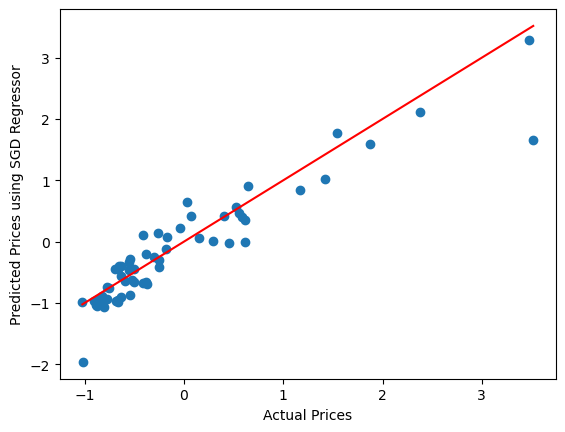

In [9]:
# Visualizing actual vs predicted prices
print("\n\n")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.show()
